In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Path to raw data
data_path = 'Data/raw_data/'

In [3]:
def select_keywords_related_files(data_path, key_words):
    filenames = [filename for filename in os.listdir(data_path)]
    environment_filenames = list(filter(lambda filename: any(key_word in filename for key_word in key_words), filenames))
    environment_filepaths = list(map(lambda filename: os.path.join(data_path, filename), environment_filenames))
    return environment_filepaths

In [217]:
populations_df = pd.read_csv('Data/raw_data/Population_E_All_Data_(Normalized).csv', encoding='latin-1')
print(populations_df.Element.unique())
print(populations_df.Item.unique())
populations_df['is_country'] = populations_df['Area Code'].apply(lambda code: len(str(code)) < 4)
populations_df = population_df[(population_df.Element == 'Total Population - Both sexes') & (populations_df.is_country)
                               & (populations_df.Year == 2014) & (populations_df.Area != 'China, mainland')]
populations_df = populations_df[['Area', 'Value']].sort_values(by='Value', ascending=False)
populations_df = populations_df.rename(columns={'Value': 'Population'})

['Total Population - Both sexes' 'Total Population - Male'
 'Total Population - Female' 'Rural population' 'Urban population']
['Population - Est. & Proj.']


In [208]:
# Select all files which are related to climate change
emissions_paths = select_keywords_related_files(data_path, key_words=['Emissions'])
emissions_paths

['Data/raw_data/Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Land_Use_Cropland_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Agriculture_Manure_applied_to_soils_E_All_Data_(Norm).csv',
 'Data/raw_data/Environment_Emissions_intensities_E_All_Data_(Normalized).zip',
 'Data/raw_data/Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv',
 'Data/raw_data/Environment_Emissions_intensities_E_All_Data.zip',
 'Data/raw_data/Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Agriculture_Enteric_Fermentation_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Agriculture_Manure_left_on_pasture_E_All_Data_(Norm).csv',
 'Data/raw_data/Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv',
 'Data/raw_data/Emissions_Agriculture_Rice_Cultivation_E_All_Data_(Norm).csv',
 'Data/raw_data/Emissions_Land_Use_Burning_Bi

In [209]:
emissions_df = pd.read_csv('Data/raw_data/Environment_Emissions_intensities_E_All_Data_(Normalized).zip', encoding='latin-1')
emissions_df = pd.read_csv(emissions_paths[-6], encoding='latin-1')
print(emissions_df.Element.unique())
print(emissions_df.Item.unique())
print(emissions_df.Year.max())
emissions_df[emissions_df.Element == 'Emissions (CO2eq)']

['Emissions intensity' 'Emissions (CO2eq)' 'Production']
['Cereals excluding rice' 'Rice, paddy' 'Meat, cattle'
 'Milk, whole fresh cow' 'Meat, goat' 'Milk, whole fresh goat'
 'Meat, sheep' 'Milk, whole fresh sheep' 'Milk, whole fresh camel'
 'Meat, chicken' 'Eggs, hen, in shell' 'Milk, whole fresh buffalo'
 'Meat, pig' 'Meat, buffalo']
2014


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
54,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1961,1961,gigagrams,402.2165,Fc
55,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1962,1962,gigagrams,408.3269,Fc
56,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1963,1963,gigagrams,385.7396,Fc
57,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1964,1964,gigagrams,406.7923,Fc
58,2,Afghanistan,1718,Cereals excluding rice,7231,Emissions (CO2eq),1965,1965,gigagrams,410.0940,Fc
...,...,...,...,...,...,...,...,...,...,...,...
360747,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2010,2010,gigagrams,68240.2449,A
360748,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2011,2011,gigagrams,68280.1864,A
360749,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2012,2012,gigagrams,67726.0490,A
360750,5873,OECD,1035,"Meat, pig",7231,Emissions (CO2eq),2013,2013,gigagrams,67107.0537,A


In [210]:
emissions_df['is_country'] = emissions_df['Area Code'].apply(lambda code: len(str(code)) < 4)
emissions_country = emissions_df[(emissions_df.Element == 'Emissions (CO2eq)') & (emissions_df.is_country)]
emissions_country_total = emissions_country[emissions_country.Year == 2014][['Area', 'Value']]\
    .groupby('Area', as_index=False).agg('sum').sort_values(by='Value', ascending=False)
emissions_country_total

,Area,Value
38,China,630376.6948
42,"China, mainland",626722.3055
91,India,546907.0133
24,Brazil,406147.1473
204,United States of America,304729.7023
...,...,...
133,Nauru,1.2140
118,Maldives,0.4847
192,Tokelau,0.4186
163,Saint Pierre and Miquelon,0.1731


In [214]:
emissions_normalized = emissions_country_total.merge(populations_df, how='inner')
emissions_normalized['Normalized Emissions'] = emissions_normalized.Value / (1000 * emissions_normalized.Population)
emissions_normalized.sort_values(by='Normalized Emissions', ascending=False).head(30)

,Area,Value,Population,Normalized Emissions
169,Falkland Islands (Malvinas),140.9847,2.887,0.048834
26,New Zealand,36244.8732,4566.700,0.007937
39,Uruguay,23310.9163,3419.550,0.006817
53,Mongolia,15081.1495,2923.900,0.005158
8,Australia,96182.6188,23474.700,0.004097
34,Paraguay,25844.7757,6552.580,0.003944
191,Montserrat,19.1456,5.098,0.003756
49,Ireland,17212.0550,4686.350,0.003673
7,Argentina,101050.2965,42981.500,0.002351
128,Guyana,1759.1940,763.393,0.002304


In [200]:
emissions_country = emissions_country[['Area', 'Item', 'Value']].groupby(['Area', 'Item'], as_index=False).agg('mean')
emissions_country = emissions_country.sort_values('Value', ascending=False).groupby(['Area'], as_index=False).first()
emissions_country.sort_values(by='Value', ascending=False).rename(columns={'Value': })

,Area,Item,Value
25,Brazil,"Meat, cattle",201549.759811
213,United States of America,"Meat, cattle",158136.003967
39,China,"Rice, paddy",151806.236070
43,"China, mainland","Rice, paddy",148894.405585
206,USSR,"Milk, whole fresh cow",121418.640245
...,...,...,...
145,Niue,"Meat, pig",0.653972
199,Tokelau,"Meat, pig",0.369615
168,Saint Pierre and Miquelon,"Meat, pig",0.230660
121,Maldives,Cereals excluding rice,0.065072


In [150]:
continents_ = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania']

In [151]:
world_emissions_intensity = emissions_df[(emissions_df.Element == 'Emissions intensity') & (emissions_df.Area == 'World')]
items = world_emissions_intensity.Item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk = list(filter(lambda x: 'Milk' in x, items))
remaining = list(set(items) - set(meat + milk))

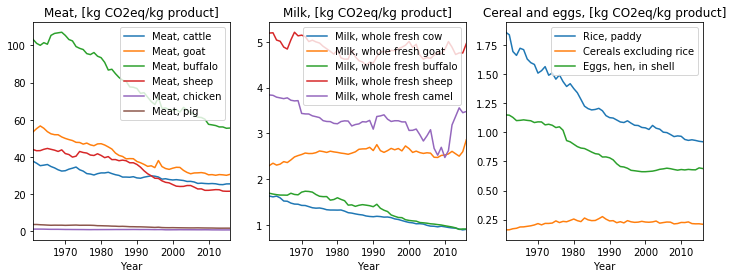

In [158]:
world_emissions_intensity = world_emissions_intensity[['Item', 'Year', 'Value']].groupby(['Item', 'Year'], as_index=False).agg('mean')
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for item in meat:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[0], label=item)
    axes[0].legend()
    axes[0].set_title('Meat, [kg CO2eq/kg product]')
for item in milk:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[1], label=item)
    axes[1].legend()
    axes[1].set_title('Milk, [kg CO2eq/kg product]')
for item in remaining:
    world_emissions_intensity[world_emissions_intensity.Item == item].plot(x='Year', y='Value', ax=axes[2], label=item)
    axes[2].legend()
    axes[2].set_title('Cereal and eggs, [kg CO2eq/kg product]')

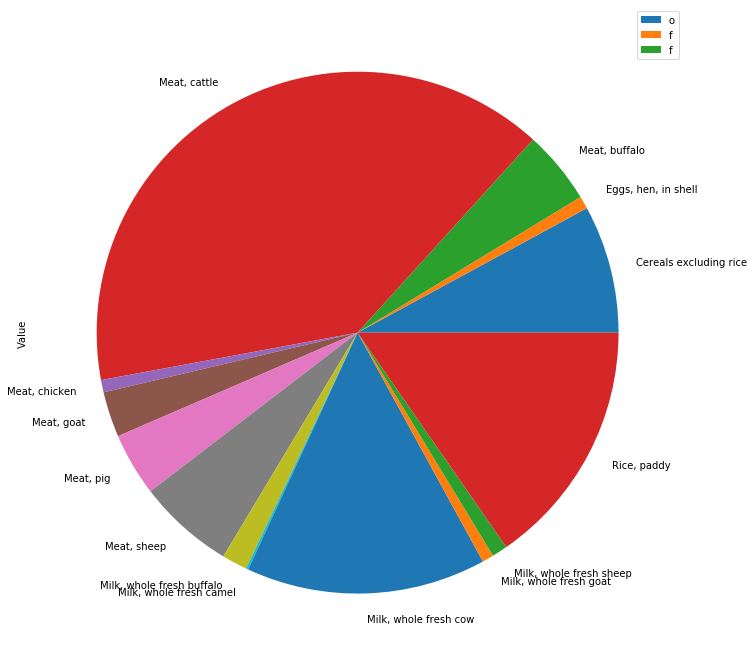

In [159]:
fig, ax = plt.subplots(figsize=(12, 12))
world_net_emissions = emissions_df[(emissions_df.Element == 'Emissions (CO2eq)') & (emissions_df.Area == 'World')]
world_net_emissions[['Item', 'Value']].groupby('Item').agg('sum').plot.pie(y='Value', ax=ax)
ax.legend('off')

In [11]:
food_paths = select_keywords_related_files(data_path, key_words=['Food'])
food_paths

['Data/raw_data/Food_Security_Data_E_All_Data_(Normalized).csv',
 'Data/raw_data/FoodSupply_LivestockFish_E_All_Data_(Normalized).csv',
 'Data/raw_data/Food_Aid_Shipments_WFP_E_All_Data_(Normalized).csv',
 'Data/raw_data/FoodSupply_Crops_E_All_Data_(Normalized).csv']

In [12]:
fao_paths = select_keywords_related_files(data_path, key_words=['fao'])
fao_paths

['Data/raw_data/fao_data_fertilizers_data.csv',
 'Data/raw_data/fao_data_crops_data.csv',
 'Data/raw_data/fao_data_forest_data.csv',
 'Data/raw_data/fao_data_production_indices_data.csv',
 'Data/raw_data/fao_data_land_data.csv']

In [13]:
fao_crops_df = pd.read_csv(fao_paths[1], encoding='latin-1')
fao_crops_df.element.unique()

array(['Area Harvested', 'Yield', 'Production Quantity', nan, 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

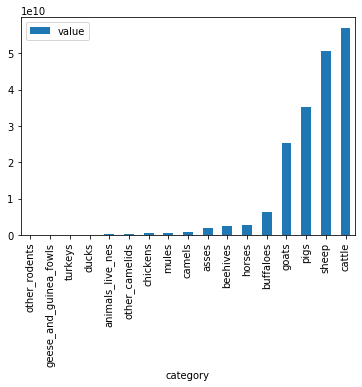

In [14]:
fao_fertilizer_df = pd.read_csv(fao_paths[0], encoding='latin-1')
world_animals = fao_fertilizer_df[fao_fertilizer_df.country_or_area == 'World +'][['value', 'category']]
world_animals.groupby('category', as_index=False).agg('sum').sort_values(by='value').plot.bar(x='category', y='value')

In [15]:
rice_prod_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Production Quantity')]
rice_area_df = fao_crops_df[(fao_crops_df.category == 'rice_paddy') & (fao_crops_df.element == 'Area Harvested')]

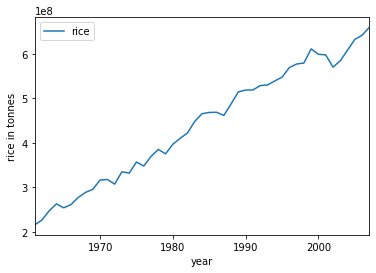

In [16]:
rice_prod_df[rice_prod_df.country_or_area == 'World +'][['year', 'value']].groupby('year').\
    agg(rice=('value', 'sum')).plot(label='rice')
plt.ylabel('rice in tonnes')
plt.legend()

In [17]:
continents = ['Africa +', 'Asia +', 'Americas +', 'Europe +', 'Oceania +']

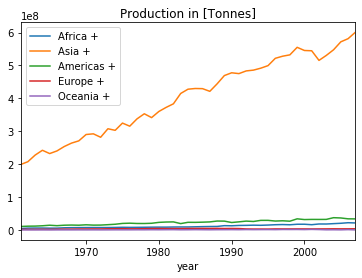

In [18]:
ax = plt.gca()
for continent in continents:
    rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Production in [Tonnes]')

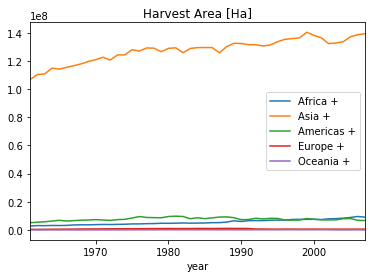

In [19]:
ax = plt.gca()
for continent in continents:
    rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Harvest Area [Ha]')

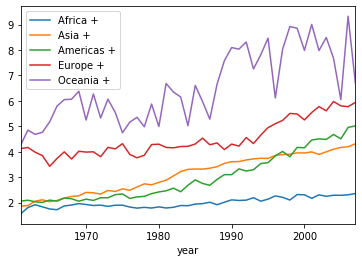

In [20]:
ax = plt.gca()
for continent in continents:
    efficiency_df = rice_prod_df[rice_prod_df.country_or_area == continent].groupby('year').agg('sum') / \
          rice_area_df[rice_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)

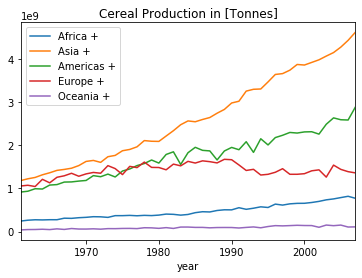

In [21]:
cereal_production_df = fao_crops_df[fao_crops_df.element == 'Production Quantity']
cereal_production_df = cereal_production_df[~cereal_production_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Production in [Tonnes]')

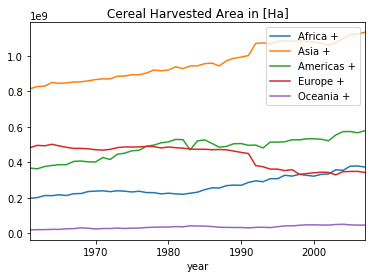

In [22]:
cereal_area_df = fao_crops_df[fao_crops_df.element == 'Area Harvested']
cereal_area_df = cereal_area_df[~cereal_area_df.category.str.contains('total')]
ax = plt.gca()
for continent in continents:
    cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum').plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Cereal Harvested Area in [Ha]')

<Figure size 864x864 with 0 Axes>

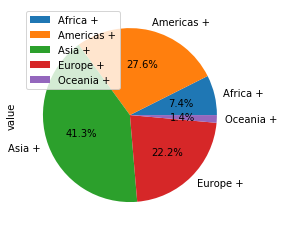

In [23]:
fig = plt.figure(figsize=(12, 12))
continent_production = cereal_production_df[(cereal_production_df.country_or_area.isin(continents)) & \
                                      (~cereal_production_df.category.str.contains('total'))]
continent_production[['country_or_area', 'value']].groupby('country_or_area').agg('sum')\
    .plot.pie(y='value', autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

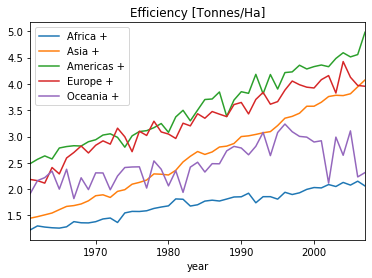

In [24]:
ax = plt.gca()
for continent in continents:
    efficiency_df = cereal_production_df[cereal_production_df.country_or_area == continent].groupby('year').agg('sum') / \
          cereal_area_df[cereal_area_df.country_or_area == continent].groupby('year').agg('sum')
    efficiency_df.plot(ax=ax)
    ax.legend(continents)
    ax.set_title('Efficiency [Tonnes/Ha]')

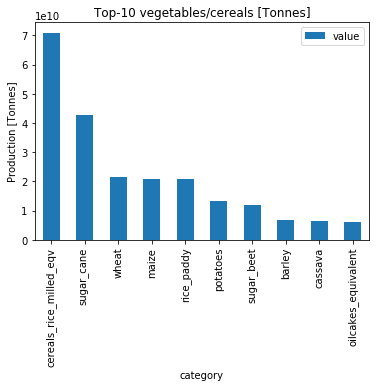

In [25]:
worlds_top_production = fao_crops_df[(fao_crops_df.country_or_area == 'World +') & \
                                     (fao_crops_df.element == 'Production Quantity')][['value', 'category']]
worlds_top_production = worlds_top_production[~worlds_top_production.category.str.contains('total')]
worlds_top_production = worlds_top_production.groupby('category', as_index=False).agg('sum').\
    sort_values(by='value', ascending=False).head(10)
worlds_top_production.plot.bar(x='category', y='value')
plt.title('Top-10 vegetables/cereals [Tonnes]')
plt.ylabel('Production [Tonnes]')
plt.show()

In [ ]:
list(filter(lambda x: 'total' in x, fao_crops_df.category.unique()))

In [ ]:
fao_crops_df.year.unique()